In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#normal0 = pd.read_excel('SWaT_Dataset_Normal_v0.xlsx')
normal1 = pd.read_excel('SWaT_Dataset_Normal_v1.xlsx')
attack = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx')

In [3]:
import os
#if not os.path.isfile(directory + 'train.csv'):
#normal0.to_csv('train.csv', index=None, header=None)
normal1.to_csv('train1.csv', index=None, header=None)
attack.to_csv('test.csv', index=None, header=None)

In [79]:
test = pd.read_csv('test.csv')
train1 = pd.read_csv('train1.csv')
#train = pd.read_csv('train.csv')

In [51]:
train.shape

(496800, 53)

In [80]:
train1.shape

(495000, 53)

In [81]:
test.shape

(449919, 53)

In [82]:
train1['Normal/Attack'] = [0 if x == 'Normal' else 1 for x in train1['Normal/Attack']]
test['Normal/Attack'] = [0 if x == 'Normal' else 1 for x in test['Normal/Attack']]

In [83]:
test['Normal/Attack'].value_counts()

0    395298
1     54621
Name: Normal/Attack, dtype: int64

In [84]:
train1['Normal/Attack'].value_counts()

0    495000
Name: Normal/Attack, dtype: int64

In [85]:
# trim column names
train1 = train1.rename(columns=lambda x: x.strip())
test = test.rename(columns=lambda x: x.strip())

In [86]:
test_labels = test['Normal/Attack']
test_labels

0         0
1         0
2         0
3         0
4         0
         ..
449914    0
449915    0
449916    0
449917    0
449918    0
Name: Normal/Attack, Length: 449919, dtype: int64

In [87]:
def search_ratio(test_labels, val_len):
    test = test_labels[val_len:]
    val = test_labels[:val_len]
    test_ratio = (np.sum(test) /test.shape[0]) * 100
    val_ratio = (np.sum(val) / val.shape[0]) * 100
    print(f'val ratio: {val_ratio}')
    print(f'test ratio: {test_ratio}')
    print('----')
    return val_ratio, test_ratio

In [88]:
vr, tr = search_ratio(test_labels=test_labels.to_numpy(), val_len=int(0.2 * test.shape[0]))
vr, tr = search_ratio(test_labels=test_labels.to_numpy(), val_len=int(0.1 * test.shape[0]))
vr, tr = search_ratio(test_labels=test_labels.to_numpy(), val_len=int(0.3 * test.shape[0]))

val ratio: 5.764422168631852
test ratio: 13.734108285917495
----
val ratio: 9.926429730390522
test ratio: 12.386152599968389
----
val ratio: 6.432302278199667
test ratio: 14.586402662060557
----


In [89]:
val_len = int(0.1 * test.shape[0])
val_len

44991

In [90]:
validation = test[:val_len]
validation.shape

(44991, 53)

In [91]:
validation['Normal/Attack'].value_counts()

0    40525
1     4466
Name: Normal/Attack, dtype: int64

In [92]:
validation_labels = validation['Normal/Attack']
validation_labels

0        0
1        0
2        0
3        0
4        0
        ..
44986    0
44987    0
44988    0
44989    0
44990    0
Name: Normal/Attack, Length: 44991, dtype: int64

In [93]:
test_clipped = test[val_len:]
test_clipped.shape

(404928, 53)

In [94]:
test_labels_clipped = test_labels[val_len:]
test_labels_clipped.shape

(404928,)

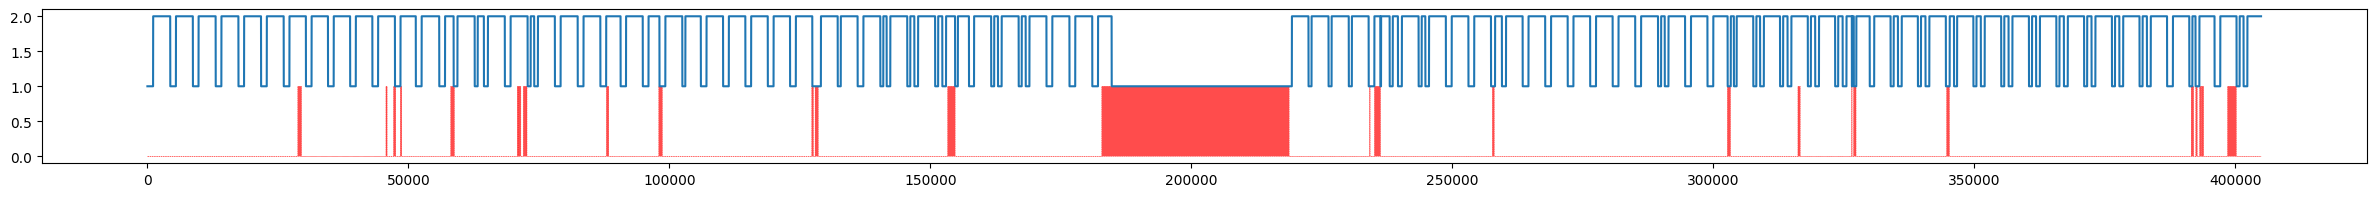

In [95]:
plt.rcParams['figure.figsize'] = 30, 2
plt.plot(test_clipped.to_numpy()[:, 4])
plt.fill_between(np.arange(test_labels_clipped.to_numpy().shape[0]), test_labels_clipped.to_numpy(), color='red', alpha=0.7, linestyle='dashed', linewidth=0.3)

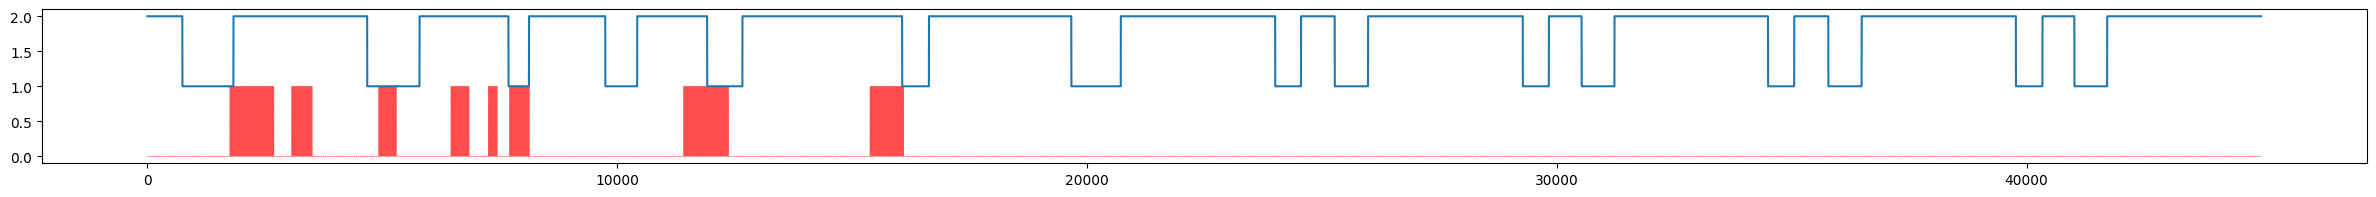

In [96]:
plt.plot(validation.to_numpy()[:, 4])
plt.fill_between(np.arange(validation_labels.to_numpy().shape[0]), validation_labels.to_numpy(), color='red', alpha=0.7, linestyle='dashed', linewidth=0.3)

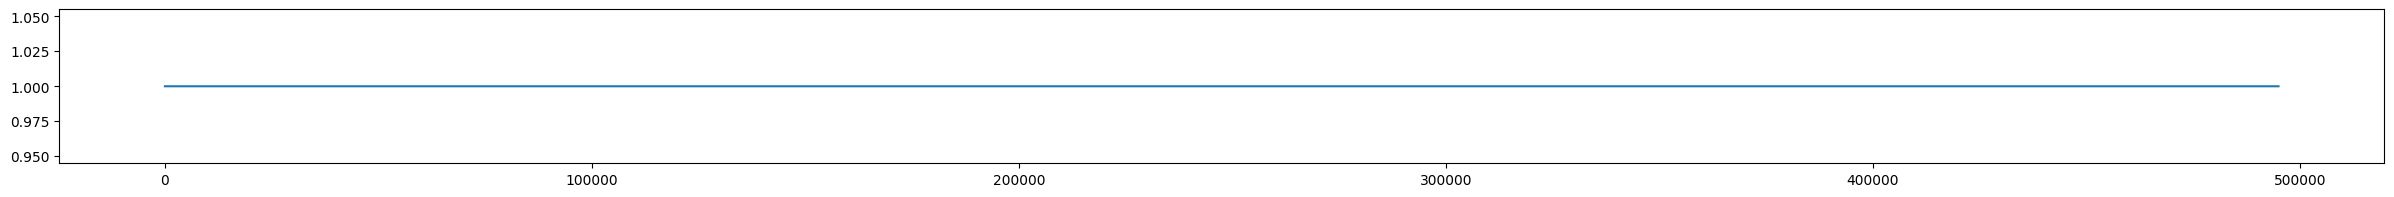

In [37]:
plt.plot(train_values[:, 4])

In [97]:
# we don't need timestamps or training labels
train_dropped = train1.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
test_dropped = test_clipped.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
validation_dropped = validation.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)

In [98]:
train_dropped.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,0.0,1,1,9.100231,0.0,3.3485,0.000256,1,1,1
1,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,0.0,1,1,9.100231,0.0,3.3485,0.000256,1,1,1
2,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,0.0,1,1,9.100231,0.0,3.3485,0.000256,1,1,1
3,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,0.0,1,1,9.100231,0.0,3.3485,0.000256,1,1,1
4,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,1,...,0.0,1,1,9.100231,0.0,3.3485,0.000256,1,1,1


In [99]:
test_dropped.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
44991,2.665983,533.0524,2,1,1,258.0108,8.381697,330.7357,2.441162,2,...,0.304583,2,1,247.6288,1.025214,186.6188,0.000064,1,1,1
44992,2.644525,532.3066,2,1,1,258.0108,8.381697,330.7357,2.441162,2,...,0.304583,2,1,247.5487,1.025214,186.6188,0.000064,1,1,1
44993,2.621785,532.1497,2,1,1,258.0108,8.381697,330.7357,2.436036,0,...,0.304583,2,1,247.5487,1.025214,186.5387,0.000064,1,1,1
44994,2.613778,531.5216,2,1,1,258.0108,8.381697,330.7357,2.338641,0,...,0.304583,2,1,247.5487,1.025214,186.5227,0.000064,1,1,1
44995,2.613778,531.4038,2,1,1,258.0108,8.381697,330.7357,2.221510,0,...,0.304583,2,1,247.5487,1.025214,186.5227,0.000064,1,1,1


In [100]:
validation_dropped.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1


In [101]:
# Transform all columns into float64
for i in list(train_dropped):
    train_dropped[i]=train_dropped[i].apply(lambda x: str(x).replace("," , "."))
train_dropped = train_dropped.astype(float)

for i in list(test_dropped):
    test_dropped[i]=test_dropped[i].apply(lambda x: str(x).replace("," , "."))
test_dropped = test_dropped.astype(float)

for i in list(validation_dropped):
    validation_dropped[i]=validation_dropped[i].apply(lambda x: str(x).replace("," , "."))
validation_dropped = validation_dropped.astype(float)

In [57]:
train_values = train_dropped.values
test_values = test_dropped.values
validation_values = validation_dropped.values

In [102]:
print(f'Train min: {train_values.min()}')
print(f'Train max: {train_values.max()}')
print('---')
print(f'Test min: {test_values.min()}')
print(f'Test max: {test_values.max()}')
print('---')
print(f'Validation min: {validation_values.min()}')
print(f'Validation max: {validation_values.max()}')

Train min: 0.0
Train max: 1014.724
---
Test min: 0.0
Test max: 1201.0
---
Validation min: 0.0
Validation max: 1200.0


In [32]:
test_values.min(axis=0)

array([  0.      , 189.8263  ,   0.      ,   1.      ,   1.      ,
       168.0338  ,   8.366317, 285.3371  ,   0.      ,   0.      ,
         1.      ,   1.      ,   1.      ,   1.      ,   1.      ,
         1.      ,   0.      ,   0.      , 364.3863  ,   0.      ,
         0.      ,   0.      ,   0.      ,   1.      ,   1.      ,
       148.7599  , 140.8357  ,   0.      , 243.0146  ,   1.      ,
         1.      ,   1.      ,   1.      ,   1.      ,   7.432902,
       129.8385  , 244.8731  ,   9.536016,   0.      ,   0.      ,
         0.      ,   0.      ,   1.      ,   1.      ,   9.468726,
         0.      ,   3.14022 ,   0.      ,   1.      ,   1.      ,
         1.      ])

In [30]:
train_values.shape

(495000, 51)

In [103]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler

def scale_data(train, test, validation):
    scaler = MinMaxScaler(feature_range=(0, 1), clip=True).fit(train)
    #scaler = MaxAbsScaler().fit(train)

    train_scaled = scaler.transform(train)
    test_scaled = scaler.transform(test)
    validation_scaled = scaler.transform(validation)

    # train_scaled = scaler.fit_transform(train)
    # validation_scaled = scaler.fit_transform(validation)
    # test_scaled = scaler.fit_transform(test)

    return train_scaled, test_scaled, validation_scaled

In [104]:
train_norm, test_norm, validation_norm = scale_data(train_values, test_values, validation_values)

In [105]:
for i in range(51):
    print(f'-----Dim {i}----')
    print(f'TRAIN original: {train_values[:, i].min()}, {train_values[:, i].max()}')
    print(f'TRAIN norm:    {train_norm[:, i].min()}, {train_norm[:, i].max()}')
    print(f'TEST original: {test_values[:, i].min()}, {test_values[:, i].max()}')
    print(f'TEST norm:    {test_norm[:, i].min()}, {test_norm[:, i].max()}')
    print(f'VAL original: {validation_values[:, i].min()}, {validation_values[:, i].max()}')
    print(f'VAL norm:    {validation_norm[:, i].min()}, {validation_norm[:, i].max()}')


-----Dim 0----
TRAIN original: 0.0, 2.745092
TRAIN norm:    0.0, 1.0
TEST original: 0.0, 2.760145
TEST norm:    0.0, 1.0
VAL original: 0.0, 2.698972
VAL norm:    0.0, 0.9831991058951758
-----Dim 1----
TRAIN original: 120.6237, 817.5565
TRAIN norm:    0.0, 1.0
TEST original: 189.8263, 888.1722
TEST norm:    0.09929594359743149, 1.0
VAL original: 488.0688, 925.0323
VAL norm:    0.5272317503208344, 1.0
-----Dim 2----
TRAIN original: 0.0, 2.0
TRAIN norm:    0.0, 1.0
TEST original: 0.0, 2.0
TEST norm:    0.0, 1.0
VAL original: 0.0, 2.0
VAL norm:    0.0, 1.0
-----Dim 3----
TRAIN original: 1.0, 2.0
TRAIN norm:    0.0, 1.0
TEST original: 1.0, 2.0
TEST norm:    0.0, 1.0
VAL original: 1.0, 2.0
VAL norm:    0.0, 1.0
-----Dim 4----
TRAIN original: 1.0, 1.0
TRAIN norm:    0.0, 0.0
TEST original: 1.0, 2.0
TEST norm:    0.0, 1.0
VAL original: 1.0, 2.0
VAL norm:    0.0, 1.0
-----Dim 5----
TRAIN original: 251.6662, 272.5263
TRAIN norm:    0.0, 1.0
TEST original: 168.0338, 267.7198
TEST norm:    0.0, 0.

In [106]:
print(train_norm.min(), train_norm.max())
print(test_norm.min(), test_norm.max())
print(validation_norm.min(), validation_norm.max())
print(train_norm.shape, test_norm.shape, validation_norm.shape)

0.0 1.0
0.0 1.0
0.0 1.0
(495000, 51) (404928, 51) (44991, 51)


In [107]:
test_labels_clipped = test_labels_clipped.to_numpy()
test_labels_reshaped = np.zeros_like(test_norm)

for idx in range(0, len(test_labels_clipped)):
    if test_labels_clipped[idx]:
        # labels_reshaped.shape[1] == 51 aka num_feats
        test_labels_reshaped[idx][0:test_labels_reshaped.shape[1]] = 1

In [108]:
validation_labels_reshaped = np.zeros_like(validation_norm)

for idx in range(0, len(validation_labels)):
    if validation_labels[idx]:
        # labels_reshaped.shape[1] == 51 aka num_feats
        validation_labels_reshaped[idx][0:validation_labels_reshaped.shape[1]] = 1

In [109]:
print(test_labels_reshaped.shape, validation_labels_reshaped.shape)

(404928, 51) (44991, 51)


In [110]:
np.save('labels.npy', test_labels_reshaped)
np.save('labels_validation.npy', validation_labels_reshaped)
np.save('train.npy', train_norm)
np.save('test.npy', test_norm)
np.save('validation.npy', validation_norm)

In [111]:
load_test = np.load('../processed/SWAT_big/validation.npy')

In [81]:
import numpy as np
labels = np.load('../processed/SWAT_big/labels.npy')
labels_validation = np.load('../processed/SWAT_big/labels_validation.npy')
labels = (np.sum(labels, axis=1) >= 1) + 0
labels_validation = (np.sum(labels_validation, axis=1) >= 1) + 0
# labels.shape[0]

In [82]:
((labels.sum() + labels_validation.sum()) / (labels.shape[0] + labels_validation.shape[0])) * 100

12.140185233342002

In [55]:
labels.sum()

1501

In [61]:
(labels.sum() / labels.shape[0]) 

0.12386152599968389

In [113]:
load_test.shape

(44991, 51)